In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from numpy import sqrt

In [3]:
df=pd.read_csv('C:\\Users\\krishna\\AppData\\Local\\Temp\\Temp1_graduate-admissions.zip\\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
x=df.iloc[:,:-1].values

In [5]:
y=df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1_train=ss.fit_transform(x_train)
x1_test=ss.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
knn.fit(x1_train,y_train)
pred=knn.predict(x1_test)
pred

array([0.68333333, 0.72      , 0.77666667, 0.68      , 0.72666667,
       0.59      , 0.70666667, 0.74333333, 0.83666667, 0.93      ,
       0.54333333, 0.92666667, 0.65      , 0.45666667, 0.82666667,
       0.66333333, 0.68666667, 0.79333333, 0.62      , 0.72666667,
       0.89666667, 0.8       , 0.68      , 0.43333333, 0.8       ,
       0.61      , 0.48333333, 0.52666667, 0.93      , 0.65      ,
       0.70666667, 0.73333333, 0.78      , 0.62      , 0.56333333,
       0.80333333, 0.62333333, 0.88333333, 0.69666667, 0.91666667,
       0.66666667, 0.68333333, 0.74666667, 0.78333333, 0.77333333,
       0.59333333, 0.6       , 0.75      , 0.66666667, 0.64      ,
       0.66      , 0.80333333, 0.70666667, 0.91333333, 0.76333333,
       0.76666667, 0.76666667, 0.74666667, 0.77666667, 0.90333333,
       0.72333333, 0.51666667, 0.59      , 0.39333333, 0.86666667,
       0.80333333, 0.71333333, 0.93333333, 0.76      , 0.72666667,
       0.53333333, 0.87      , 0.76666667, 0.49333333, 0.93333

In [17]:
rmse_val=[]
for k in range(10):
    k=k+1
    knn=KNeighborsRegressor(k)
    knn.fit(x1_train,y_train)
    pred=knn.predict(x1_test)
    rmse=sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(rmse)
    print('error for k=',k,'is',rmse)

error for k= 1 is 0.08806247782114696
error for k= 2 is 0.06966885961460831
error for k= 3 is 0.06866423943930186
error for k= 4 is 0.06633343802336797
error for k= 5 is 0.06535227616540987
error for k= 6 is 0.06741558507579024
error for k= 7 is 0.06721439957482386
error for k= 8 is 0.06579181180055768
error for k= 9 is 0.06464518543557594
error for k= 10 is 0.06471452696265345


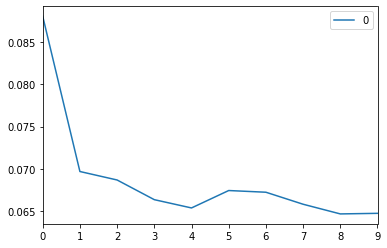

In [18]:
plot=pd.DataFrame(rmse_val)
plot.plot()
plt.show()

In [19]:
knn1=KNeighborsRegressor(4)
knn1.fit(x1_train,y_train)
pred2=knn1.predict(x1_test)
pred2

array([0.665 , 0.685 , 0.78  , 0.6875, 0.7375, 0.56  , 0.71  , 0.7225,
       0.825 , 0.92  , 0.54  , 0.935 , 0.675 , 0.46  , 0.8475, 0.675 ,
       0.6775, 0.8075, 0.625 , 0.735 , 0.9075, 0.795 , 0.6625, 0.46  ,
       0.8025, 0.635 , 0.4725, 0.55  , 0.925 , 0.6475, 0.71  , 0.735 ,
       0.7875, 0.635 , 0.6275, 0.8025, 0.665 , 0.8775, 0.7025, 0.9275,
       0.6725, 0.6775, 0.7025, 0.7975, 0.7675, 0.5975, 0.595 , 0.7375,
       0.66  , 0.645 , 0.675 , 0.7925, 0.71  , 0.92  , 0.7675, 0.77  ,
       0.76  , 0.7025, 0.74  , 0.8875, 0.73  , 0.515 , 0.6025, 0.435 ,
       0.865 , 0.7875, 0.735 , 0.895 , 0.7625, 0.73  , 0.56  , 0.8625,
       0.785 , 0.525 , 0.935 , 0.565 , 0.645 , 0.725 , 0.885 , 0.515 ,
       0.6825, 0.59  , 0.5625, 0.83  , 0.6425, 0.795 , 0.62  , 0.7325,
       0.79  , 0.815 , 0.7525, 0.92  , 0.49  , 0.555 , 0.865 , 0.6775,
       0.7475, 0.6525, 0.7375, 0.7575])

In [21]:
accuracy=r2_score(y_test,pred2)
accuracy*100

74.78627678953616